In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df_audio_features = pd.read_csv("df_audio_features_5000.csv")

In [79]:
# test = df_audio_features[['energy', 'tempo', 'acousticness', 'loudness']]

In [80]:
df_audio_features.columns = df_audio_features.columns.str.strip() 

In [81]:
test = df_audio_features[['energy', 'tempo', 'acousticness', 'loudness']]

In [82]:
# Scale data
from sklearn.preprocessing import StandardScaler
my_scaler = StandardScaler().set_output(transform='pandas')
scaled_df = my_scaler.fit_transform(test)

In [97]:
# Cluster creation
from sklearn.cluster import KMeans

my_model = KMeans(n_clusters=27, random_state=123)

my_model.fit(scaled_df)

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=27, random_state=123)

In [104]:
# Adding column clusters
scaled_df_without_clusters = scaled_df.copy()
scaled_df['cluster']  = my_model.labels_
scaled_df.head(2)

,energy,tempo,acousticness,loudness,cluster
0,-1.368556,-0.292147,1.134867,-0.604187,19
1,-0.882963,0.221160,-0.205206,-0.525544,4


In [99]:
# mean of data
clustered_centroids = scaled_df.groupby('cluster').mean()
clustered_centroids

,energy,tempo,acousticness,loudness
cluster,,,,
0,0.829726,-0.588033,-0.697242,0.642796
1,0.943082,0.422846,-0.791268,0.206985
2,-0.292227,-0.016307,0.970267,0.090214
3,-2.121980,-1.180258,1.876221,-2.892103
4,-0.150492,0.099051,-0.565738,-0.487404
5,0.558489,1.374691,-0.714278,-0.040021
6,-0.460889,-1.087150,-0.310734,-0.109747
7,-0.674173,0.835866,0.960320,0.022198
8,-1.475591,-1.184934,1.676286,-0.753760


In [116]:
scaled_df.sort_values('cluster').head(1500)

,energy,tempo,acousticness,loudness,cluster
460,0.958821,-0.956090,-0.655268,0.973603,0
3332,0.722962,-0.795443,-0.444003,0.682385,0
3326,0.865171,-0.935436,-0.410290,0.709711,0
3602,1.069814,-0.633045,-0.814377,0.368606,0
3319,0.761116,-0.726024,-0.785904,0.553060,0
...,...,...,...,...,...
323,-0.213538,0.718574,1.151724,-0.026993,7
836,-0.910711,1.406321,1.691124,0.670946,7
3155,-0.865620,1.171669,0.657273,-0.170934,7
1788,-0.334937,1.097524,1.264099,0.575779,7


In [122]:
scaled_df.assign(cluster_name=pd.cut(scaled_df['cluster'], bins=8,
                                  labels=['Afternoon Daydream', 'Rock Instrumental', 'Country Music', 'Slow Jazz',
                                         'Slow Country Music', 'Funk Instrumental', 'Hip-Hop', 'Funk Music']))

,energy,tempo,acousticness,loudness,cluster,cluster_name
0,-1.368556,-0.292147,1.134867,-0.604187,19,Funk Instrumental
1,-0.882963,0.221160,-0.205206,-0.525544,4,Rock Instrumental
2,0.265117,-0.875994,0.457807,-0.271661,12,Slow Jazz
3,-2.092782,-0.417262,1.654602,-1.394432,10,Slow Jazz
4,-1.854148,0.077701,1.758549,-1.663249,24,Funk Music
...,...,...,...,...,...,...
5230,-2.026187,-1.078754,1.761359,-2.232499,10,Slow Jazz
5231,-1.916582,-1.245808,1.587177,-1.991485,10,Slow Jazz
5232,-2.263676,-1.650523,1.856877,-5.341527,15,Slow Country Music
5233,-2.194757,-1.806794,1.665840,-3.194170,3,Afternoon Daydream


In [121]:
scaled_df

,energy,tempo,acousticness,loudness,cluster
0,-1.368556,-0.292147,1.134867,-0.604187,19
1,-0.882963,0.221160,-0.205206,-0.525544,4
2,0.265117,-0.875994,0.457807,-0.271661,12
3,-2.092782,-0.417262,1.654602,-1.394432,10
4,-1.854148,0.077701,1.758549,-1.663249,24
...,...,...,...,...,...
5230,-2.026187,-1.078754,1.761359,-2.232499,10
5231,-1.916582,-1.245808,1.587177,-1.991485,10
5232,-2.263676,-1.650523,1.856877,-5.341527,15
5233,-2.194757,-1.806794,1.665840,-3.194170,3


<AxesSubplot:>

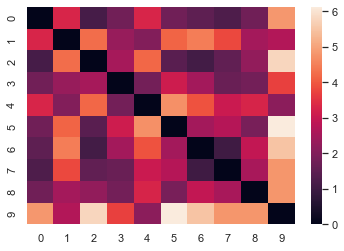

In [86]:
# Comparing clusters
from sklearn.metrics import pairwise_distances

distances_centroids = pairwise_distances(my_model.cluster_centers_)
sns.heatmap(distances_centroids)

In [87]:
max_clusters = 50

inertia_list = []

for i in range(20,max_clusters):
  model_loop = KMeans(n_clusters=i,n_init=10, random_state=123)
  model_loop.fit(scaled_df)
  inertia_list.append(round(model_loop.inertia_,3))

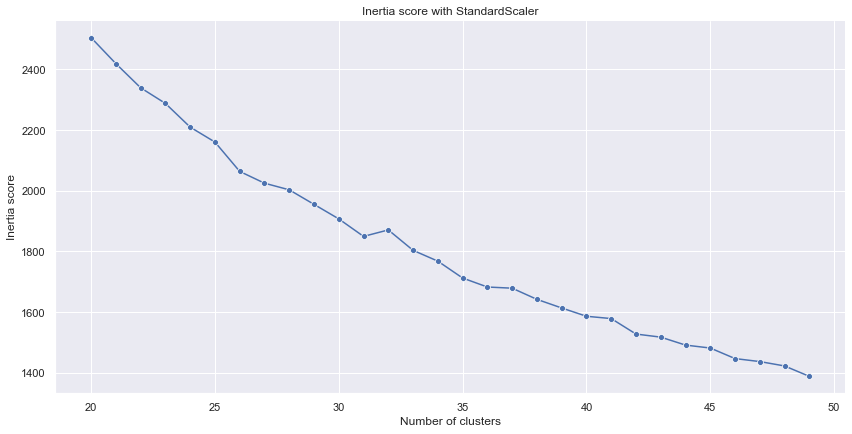

In [88]:
sns.set_theme(style='darkgrid')
(sns.relplot(kind='line',x=range(20,max_clusters),y=inertia_list,marker='o',height=6,aspect=2)
    .set(title=f"Inertia score with StandardScaler")
    .set_axis_labels("Number of clusters", "Inertia score")
);

In [89]:
from sklearn.metrics import silhouette_score

max_clusters = 50

silhouette_list = []

for i in range(20,max_clusters):
  model_loop = KMeans(n_clusters=i,n_init=10,random_state=123)
  model_loop.fit(scaled_df_without_clusters)
  score = silhouette_score(scaled_df_without_clusters,model_loop.labels_)
  silhouette_list.append(round(score,5))

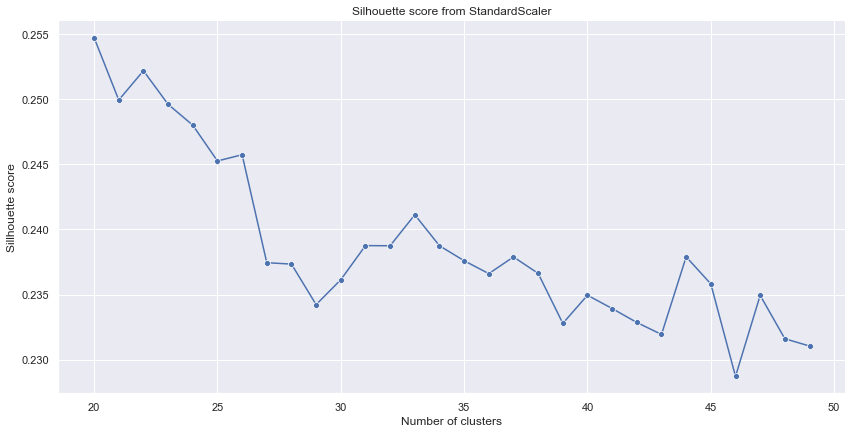

In [90]:
sns.set_theme(style='darkgrid')
(sns.relplot(kind='line',x=range(20,max_clusters),y=silhouette_list,marker='o',height=6,aspect=2)
    .set(title=f"Silhouette score from StandardScaler")
    .set_axis_labels("Number of clusters", "Sillhouette score")
);

In [91]:
sc

''

C:\Users\38093\AppData\Local\Temp\ipykernel_2832\1534692767.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (axis1) = plt.subplots(1, 1)


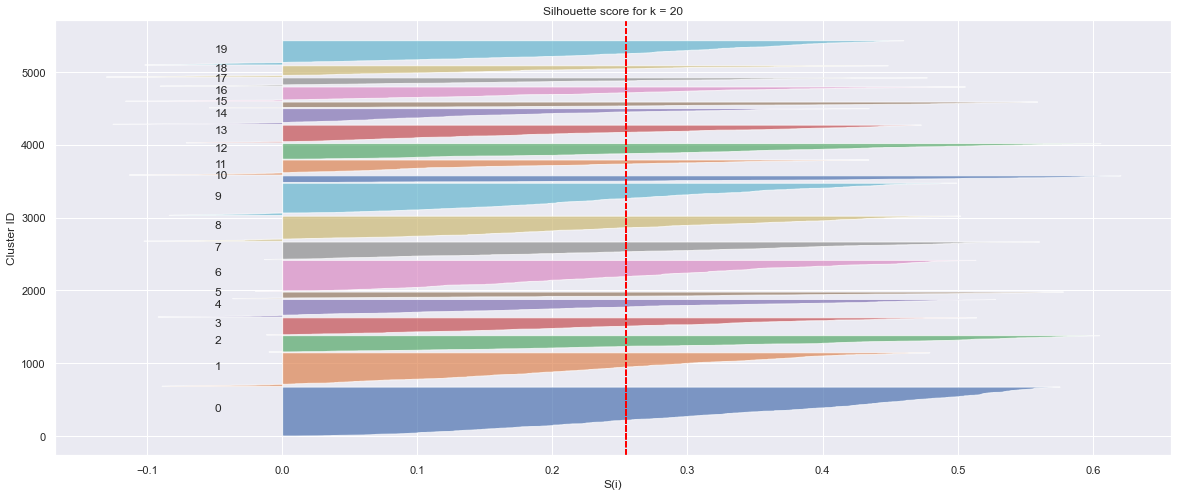

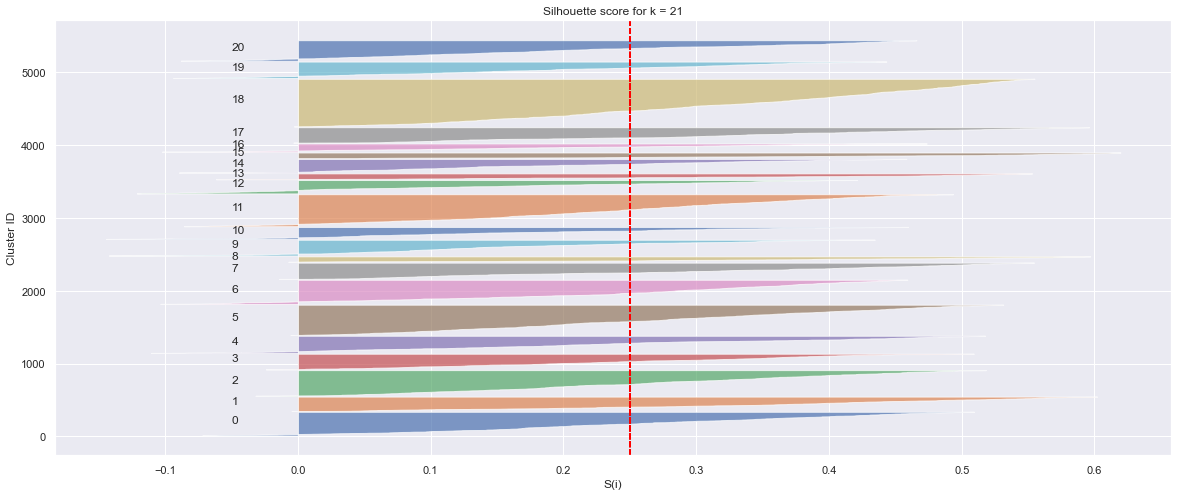

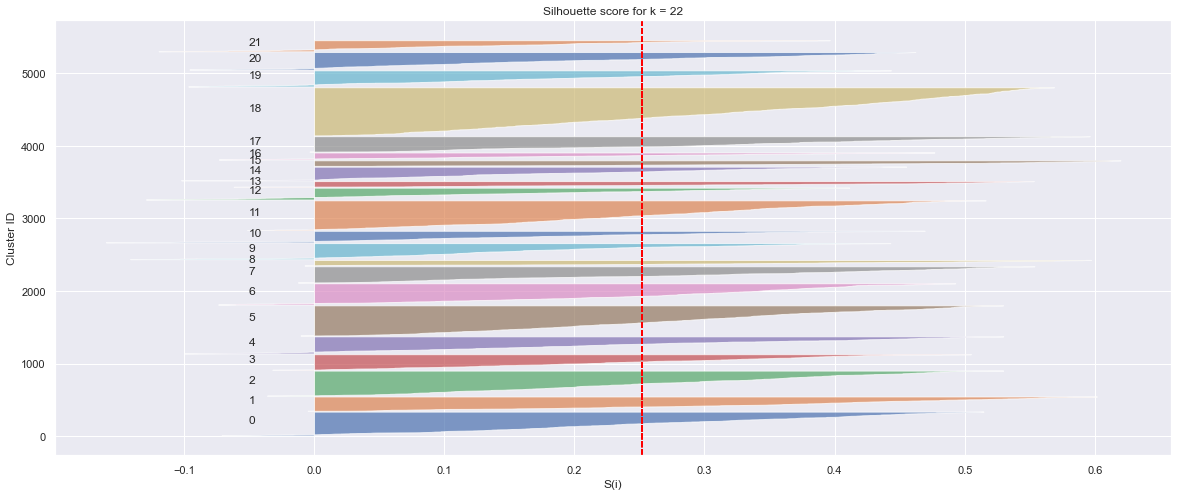

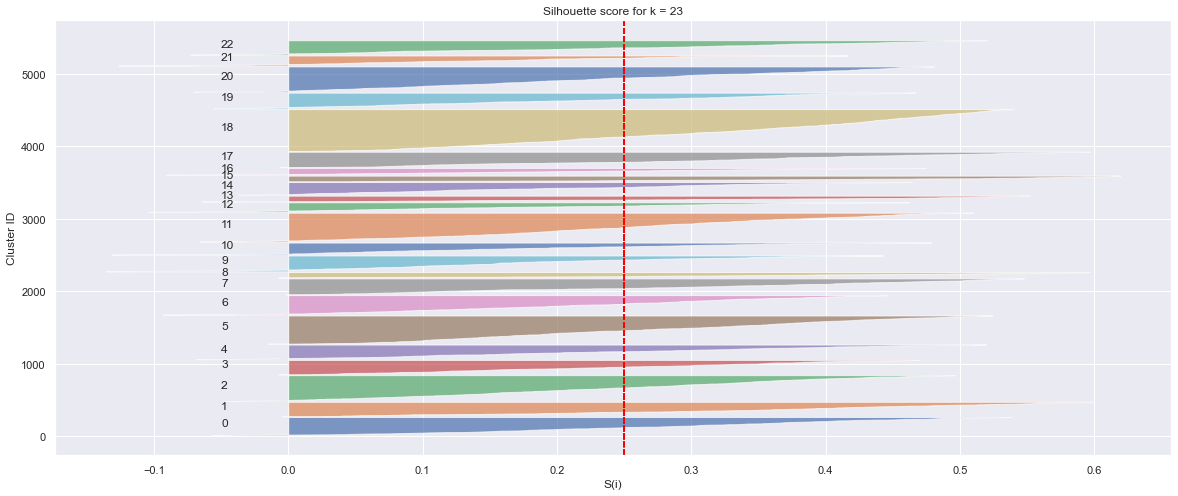

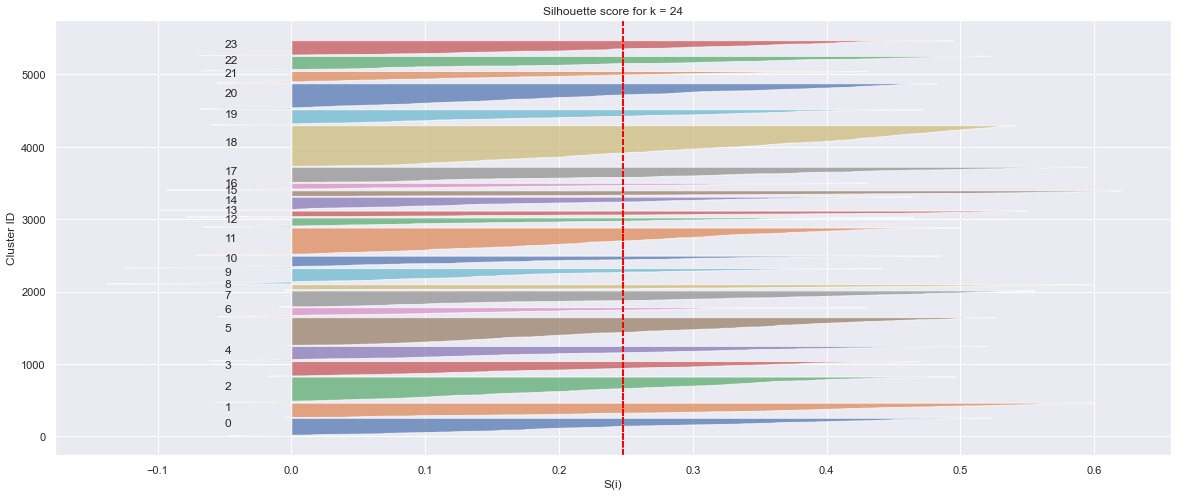

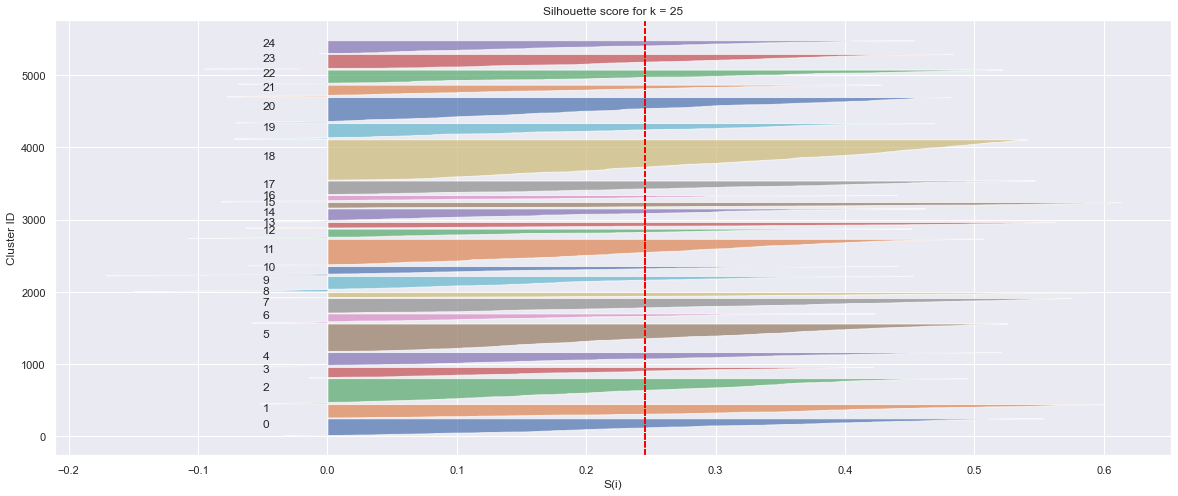

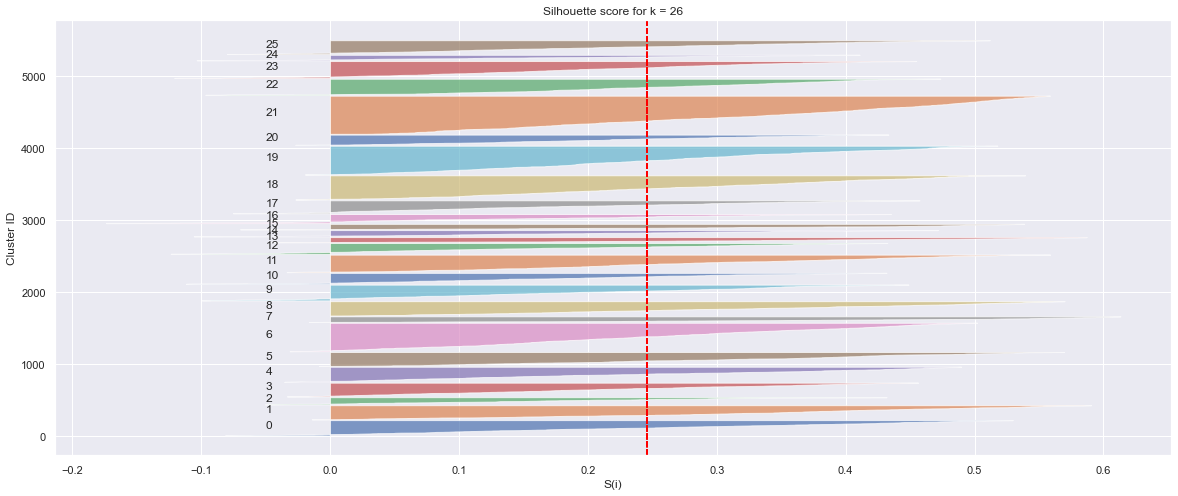

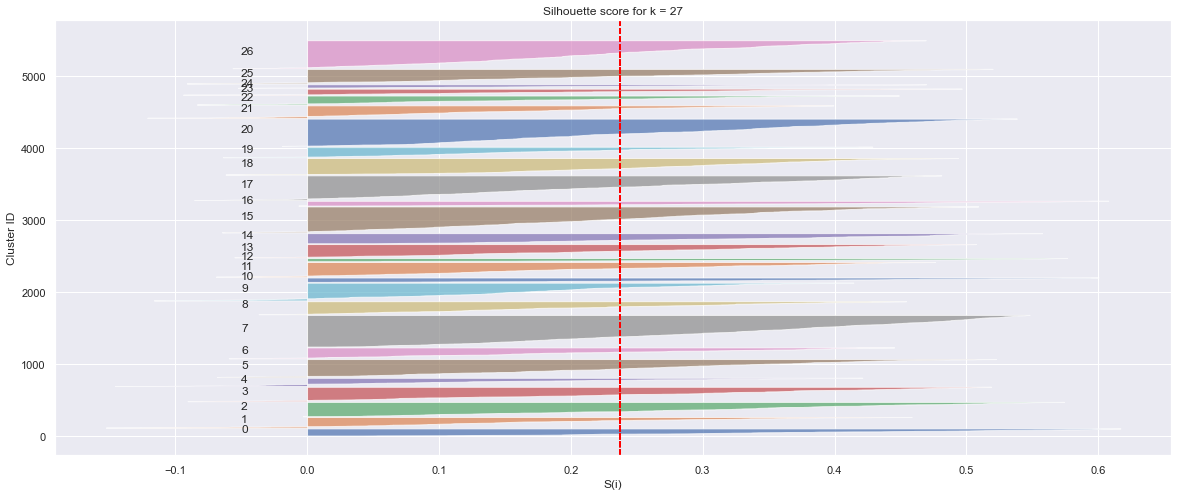

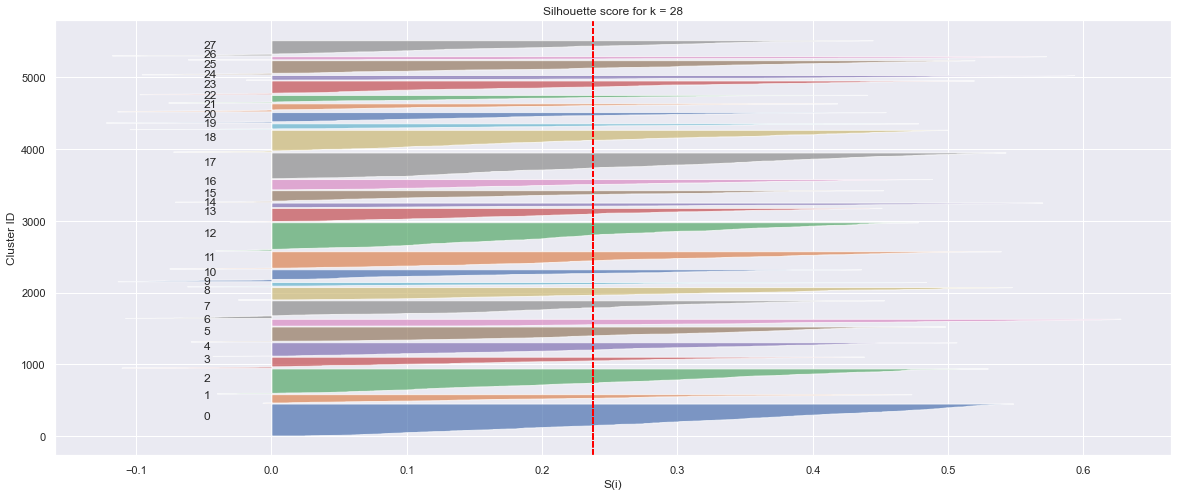

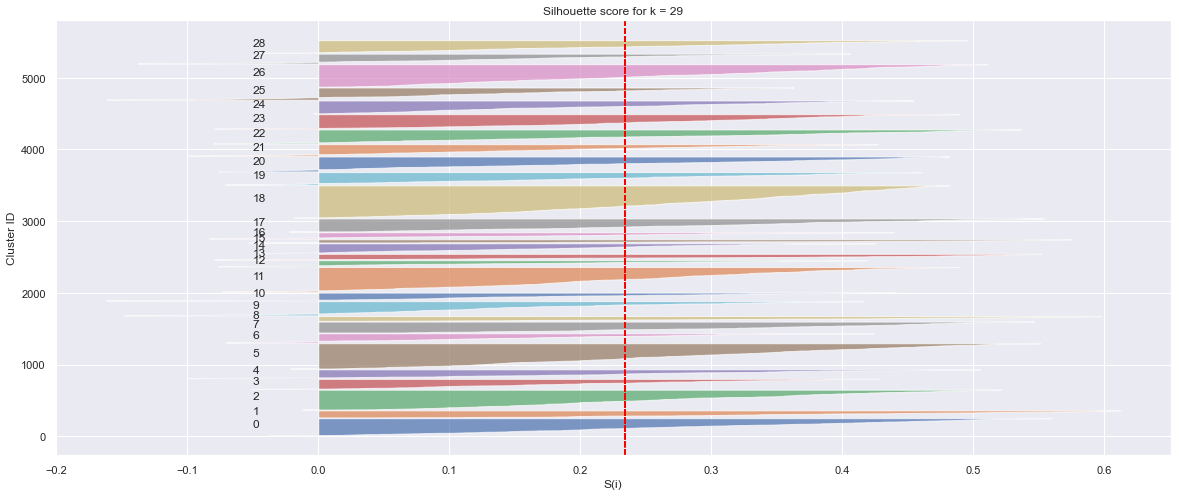

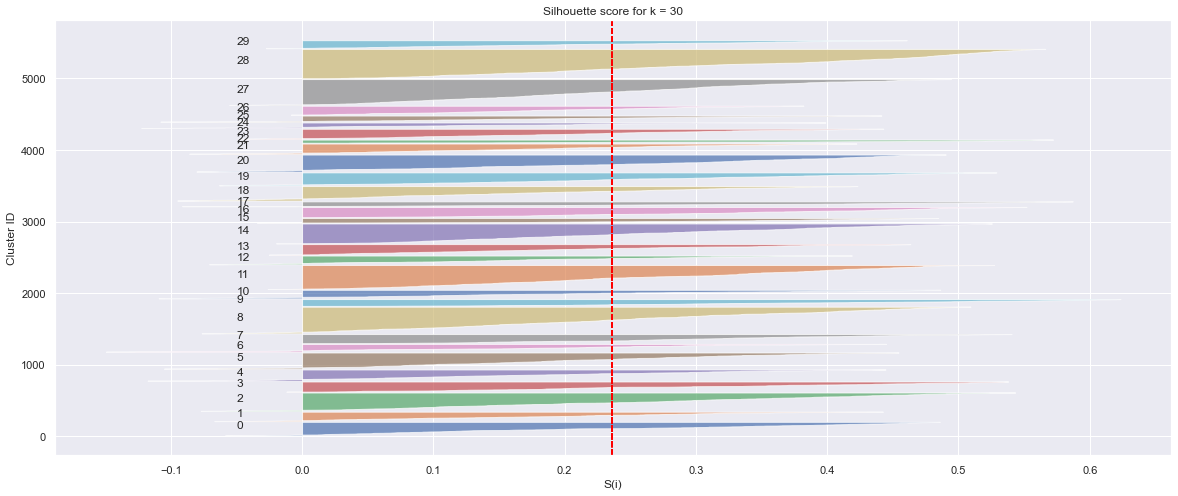

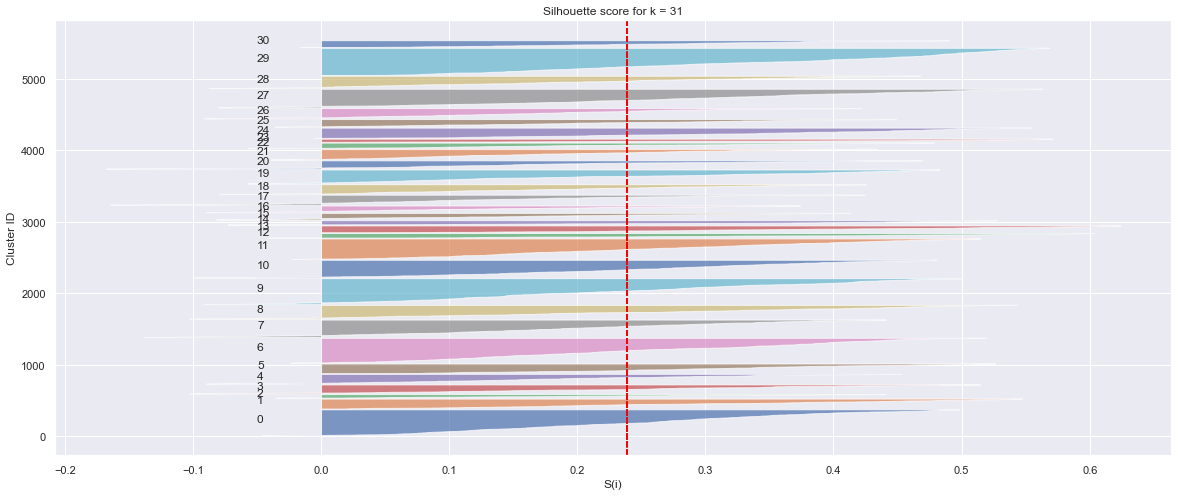

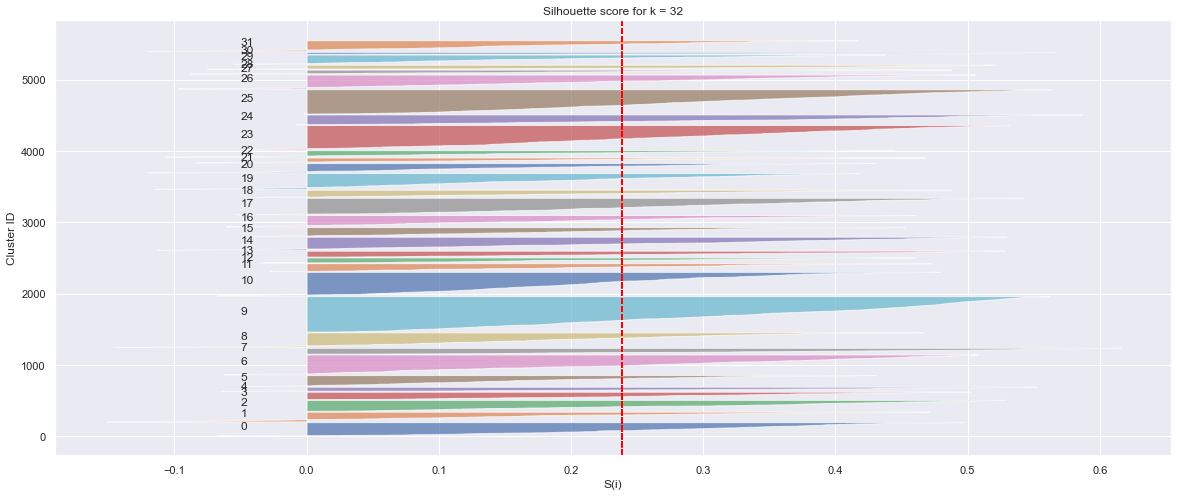

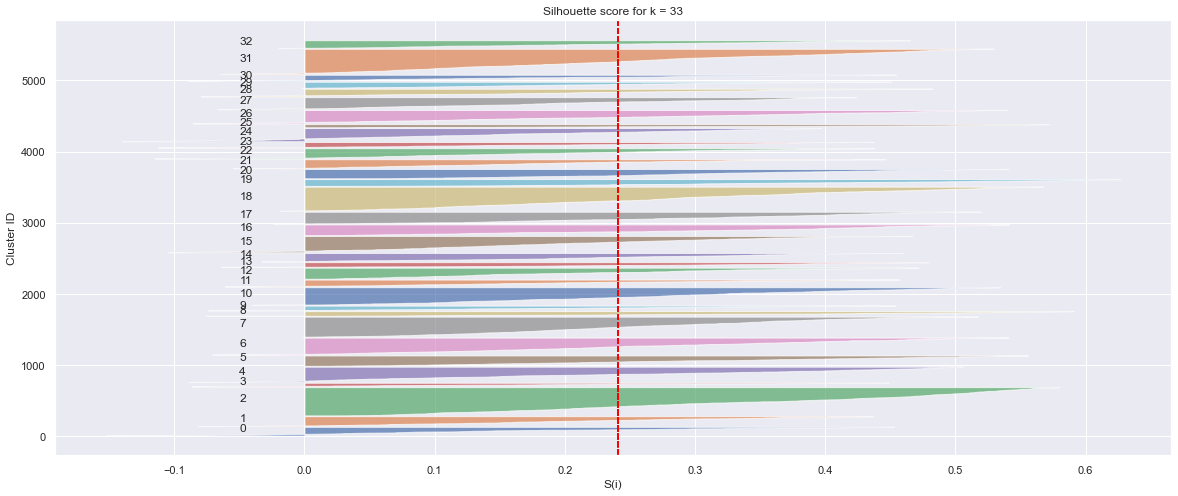

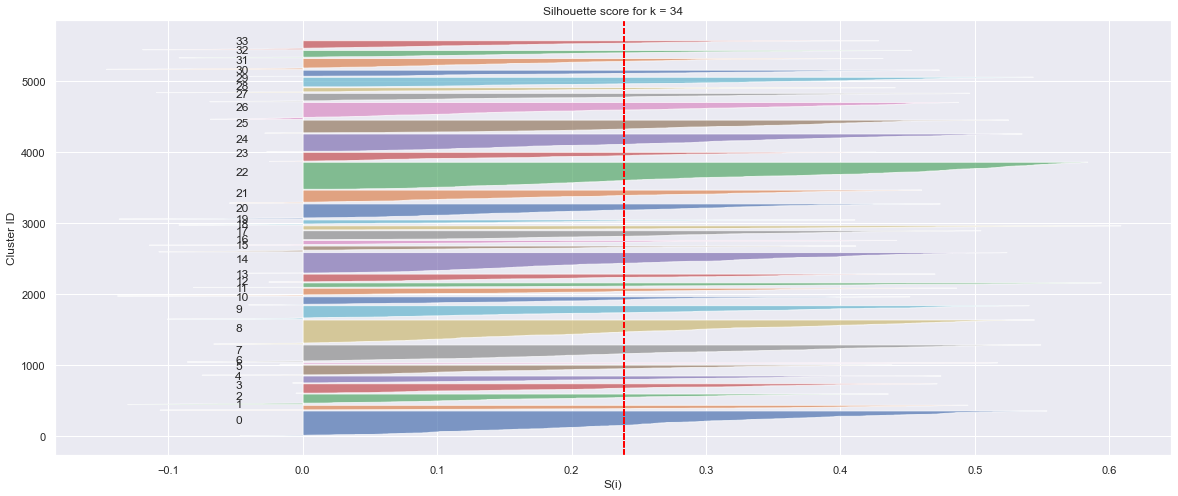

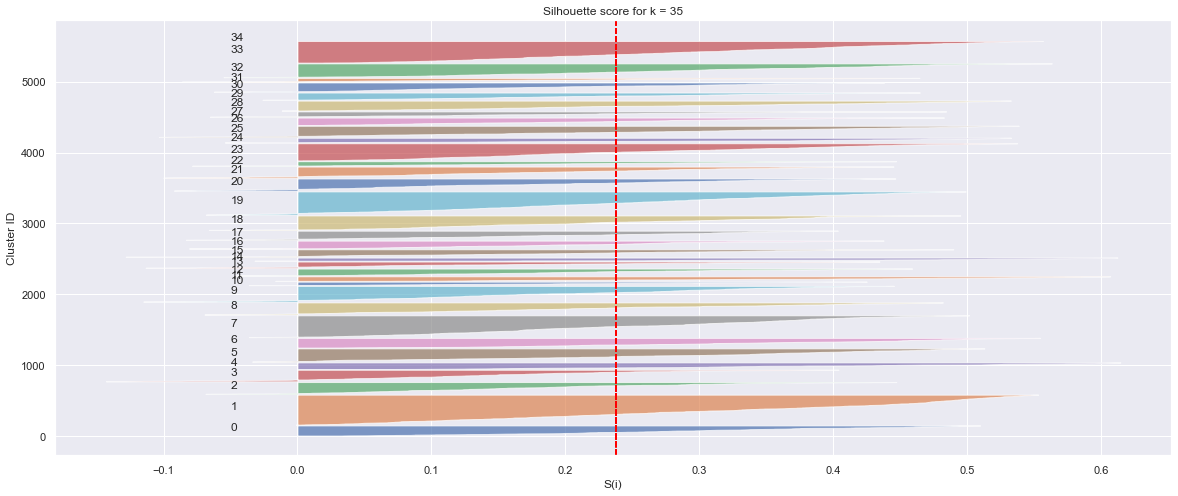

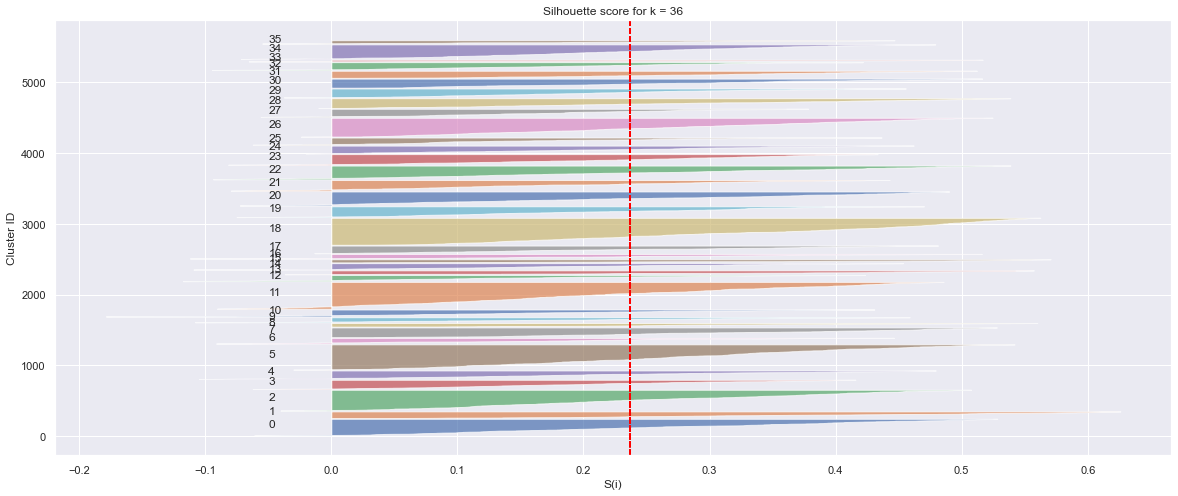

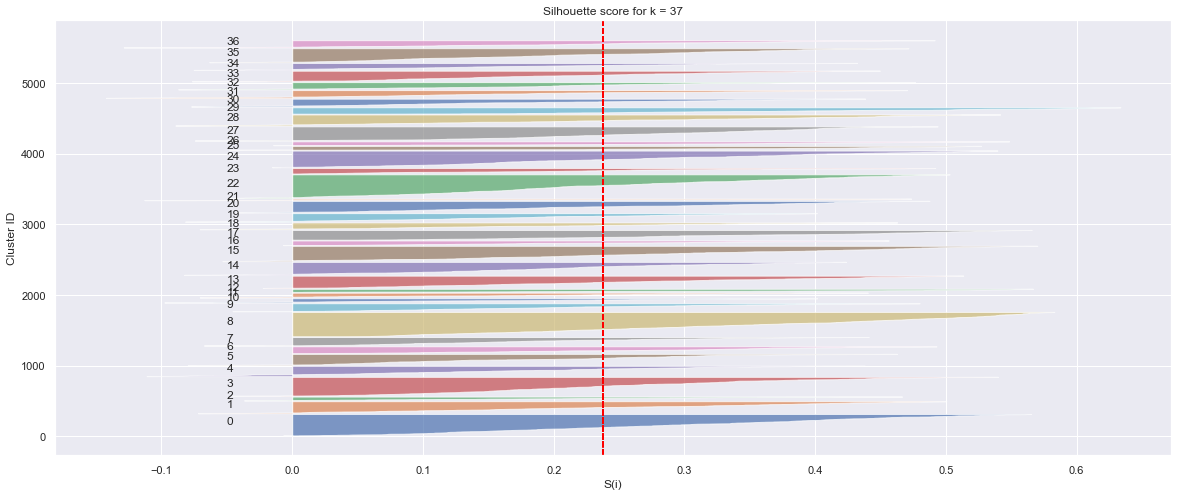

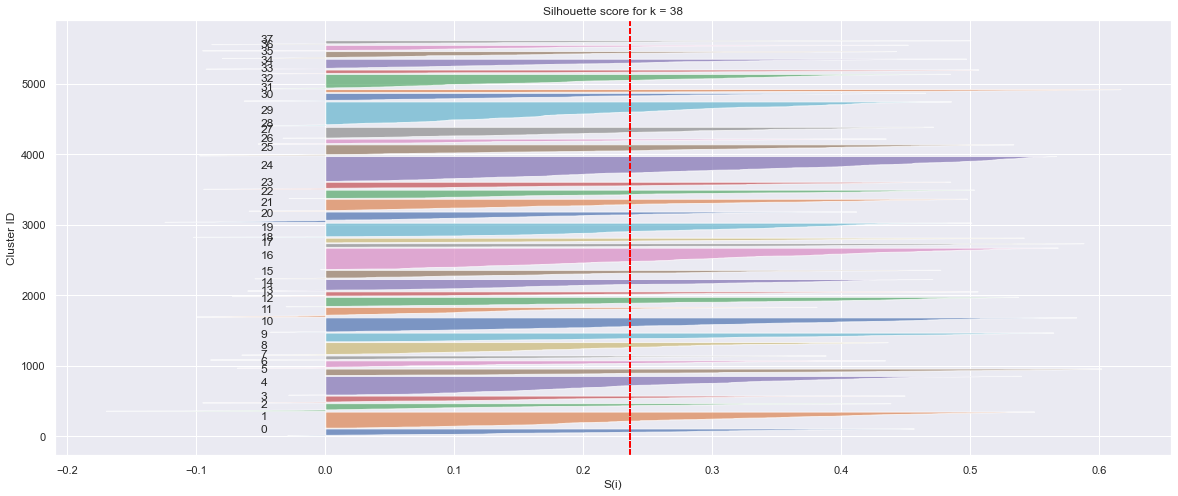

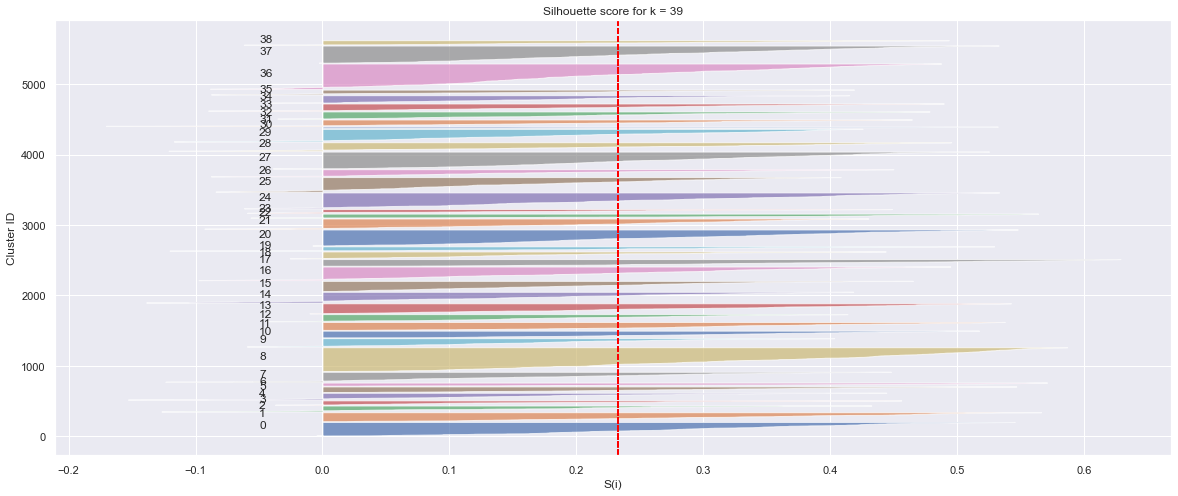

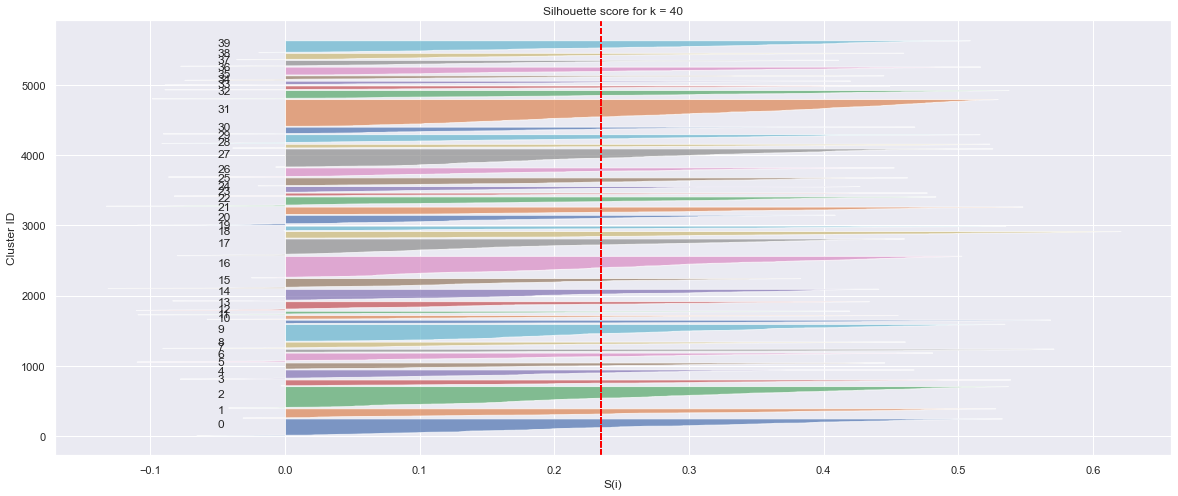

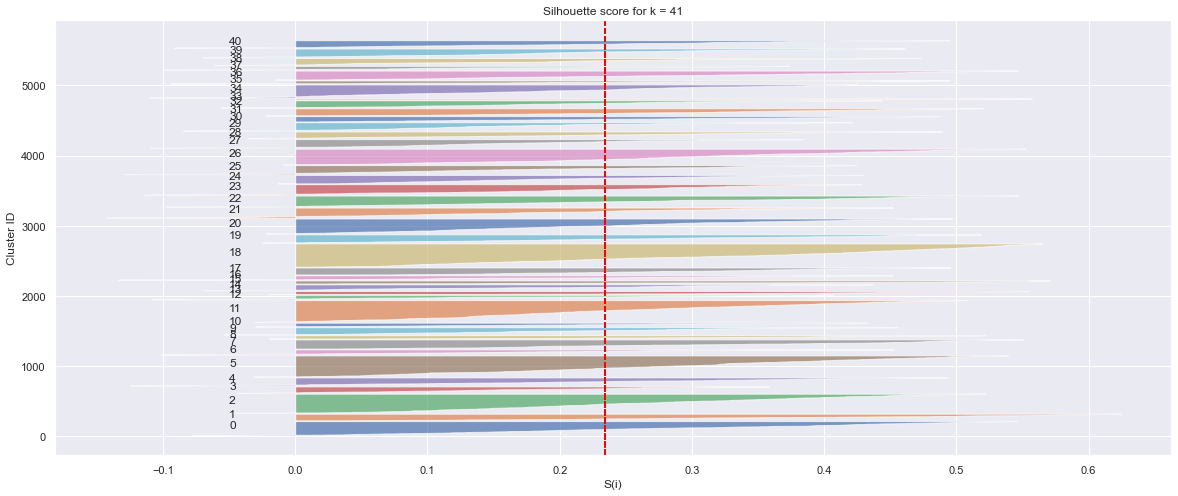

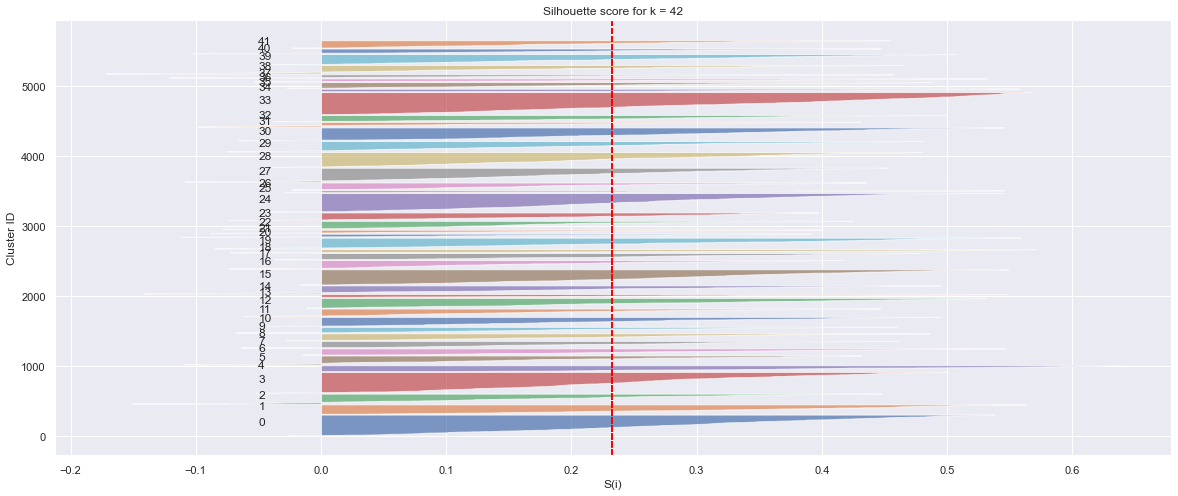

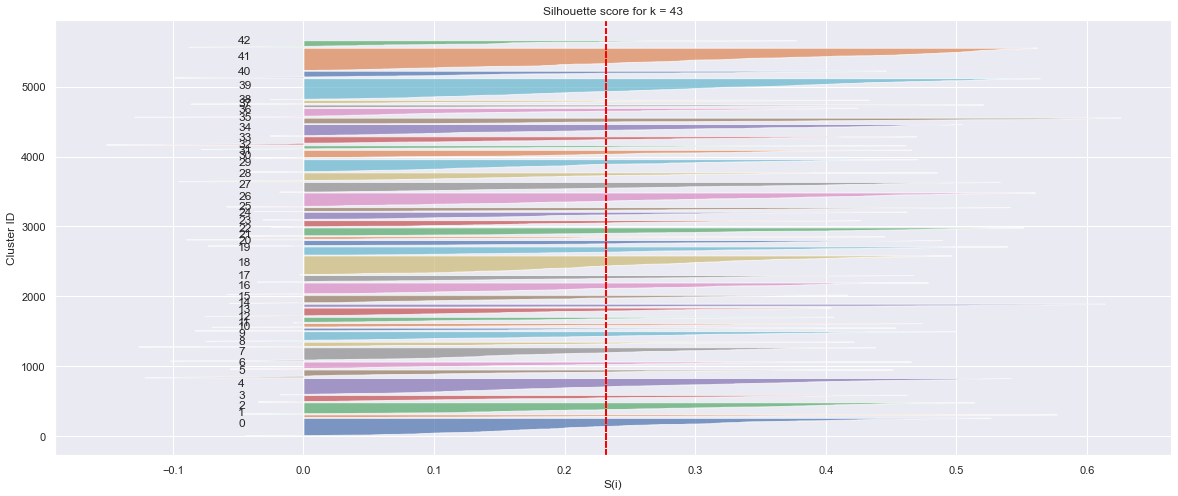

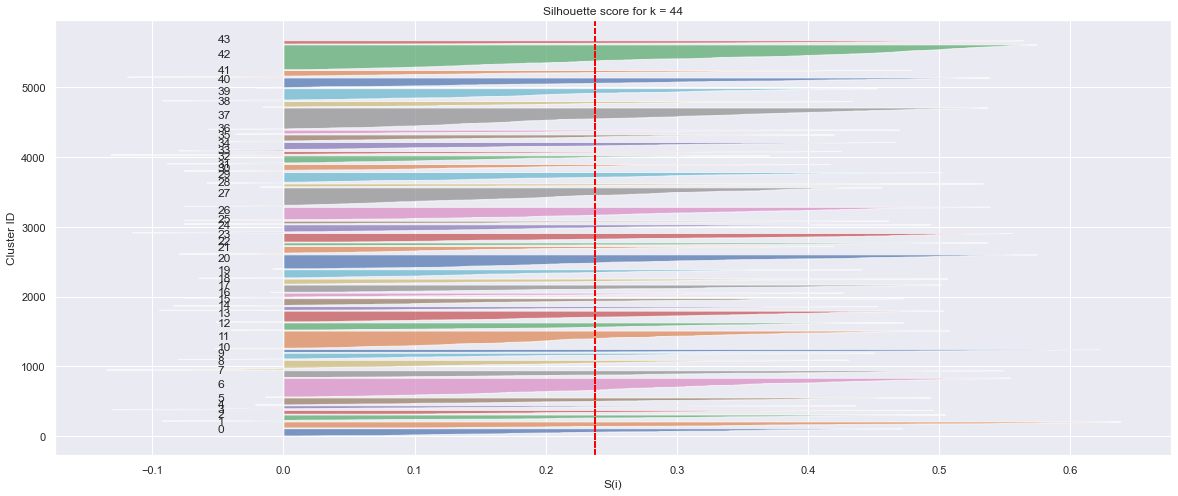

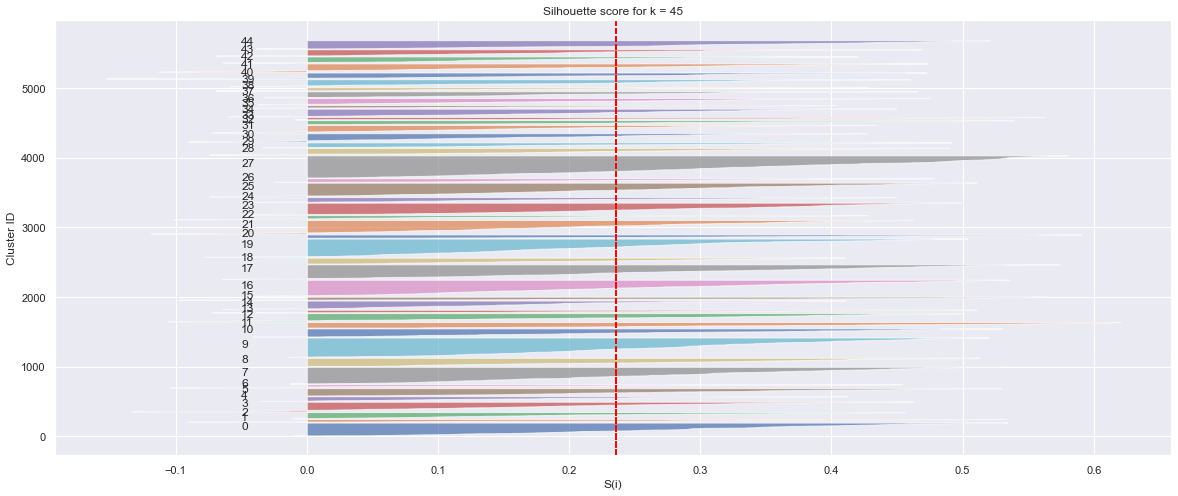

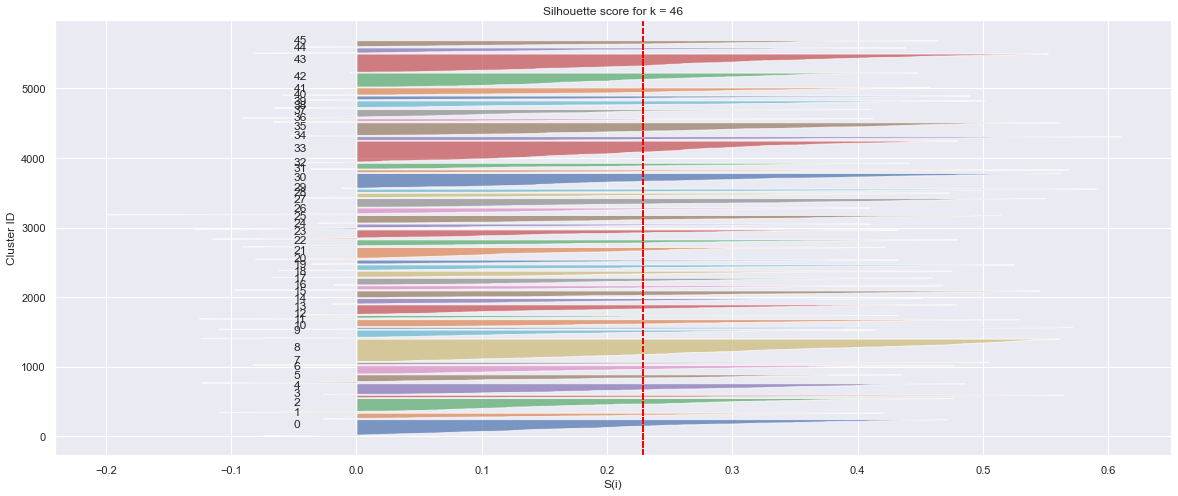

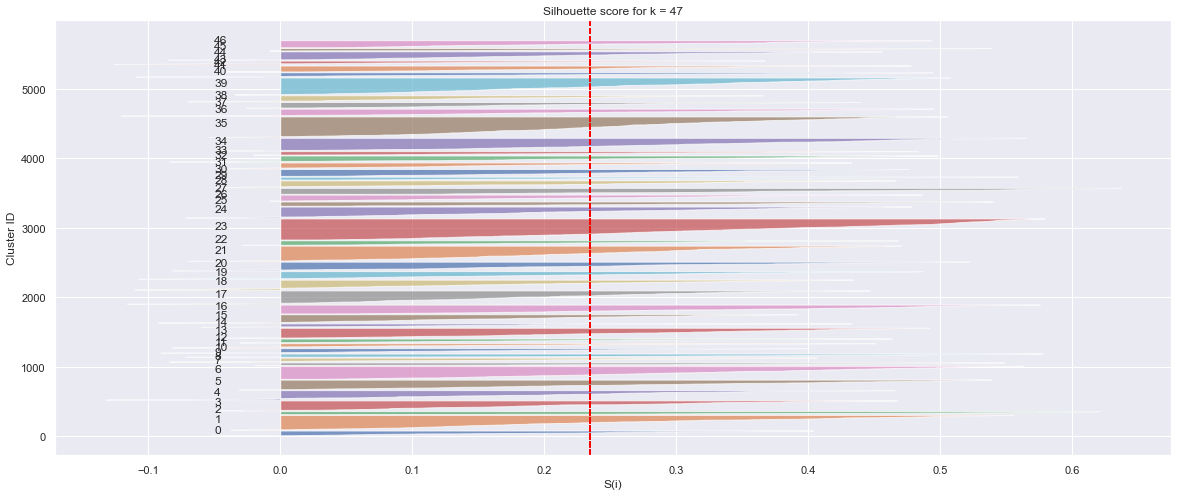

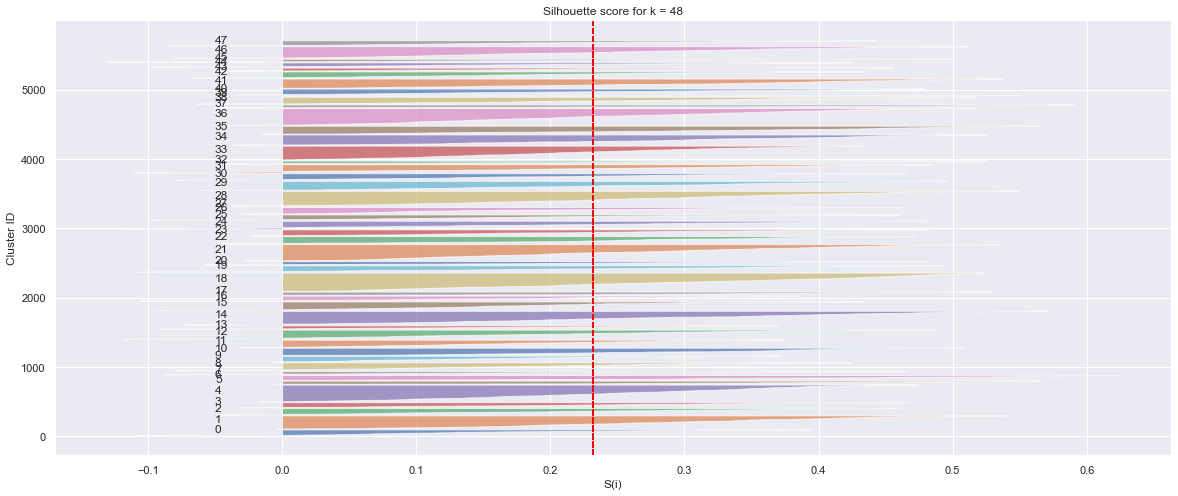

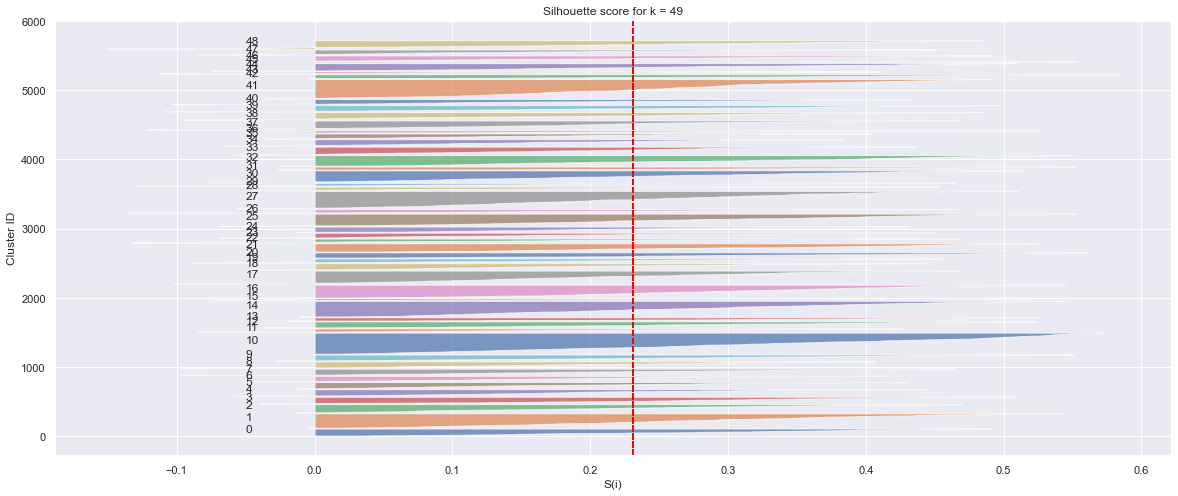

In [92]:
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

max_k = 50
data = scaled_df_without_clusters

for k in range(20, max_k): 
    kmean_model = KMeans(n_clusters=k,n_init=10,random_state=123).fit(data)
    labels = kmean_model.labels_
    
    if 1 < k < data.shape[0]: 
        
        fig, (axis1) = plt.subplots(1, 1)
        fig.set_size_inches(20, 8)
        
        sil_avg = silhouette_score(data, labels)
        # print(f"* For k = {k} the average to silhouette is: {round(sil_avg,4)}")
        sample_sil_val = silhouette_samples(data, labels)
        
        y_lower = 10
        
        for i in range(k): 
            ith_cluster_sv = sample_sil_val[labels == i]
           # print(f"\t- For cluster = {i} the silhouette value is: {round(np.mean(ith_cluster_sv),2)}")
            
            ith_cluster_sv.sort()
            
            # Calculate where to put the silhuette on the y axes
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
 
            silhouette_avg = silhouette_score(data, labels)
            axis1.axvline(x=silhouette_avg, color="red", linestyle="--")
            # Paint the cluster
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, 
                                alpha = 0.7)
            
            
            # Label the cluster
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i))
            
            # Calculate the next y lower value for the next cluster of the graph
            y_lower = y_upper + 10 # we left 10 spaces without any observation
            
        axis1.set_title("Silhouette score for k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("Cluster ID")
plt.show()

In [93]:
k_min = 20
k_max = 50